In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem import PorterStemmer
import matplotlib.ticker as mtick
from urllib.parse import urlparse

In [85]:
df_train = pd.read_csv('train.csv')

In [86]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [87]:
df_train.shape

(7613, 5)

# Relación entre los twits que tienen links y la veracidad de los mismos

In [88]:
def hasLinks(string): 
    links = re.findall("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", string) 
    return len(links) > 0

In [89]:
df = df_train
df['has_links'] = 0
df['has_links'] = df['text'].apply(hasLinks)
df

,id,keyword,location,text,target,has_links
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,False
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,False
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,False
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,False
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,False
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,True
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,False
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,True
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,False


In [90]:
df = df.groupby(['target','has_links']).count()
df

id  keyword  location  text
target has_links                               
0      False      2543     2525      1635  2543
       True       1799     1798      1249  1799
1      False      1099     1076       729  1099
       True       2172     2153      1467  2172

In [91]:
df = df.reset_index().rename(columns={'id':'cantidad'})
df

,target,has_links,cantidad,keyword,location,text
0,0,False,2543,2525,1635,2543
1,0,True,1799,1798,1249,1799
2,1,False,1099,1076,729,1099
3,1,True,2172,2153,1467,2172


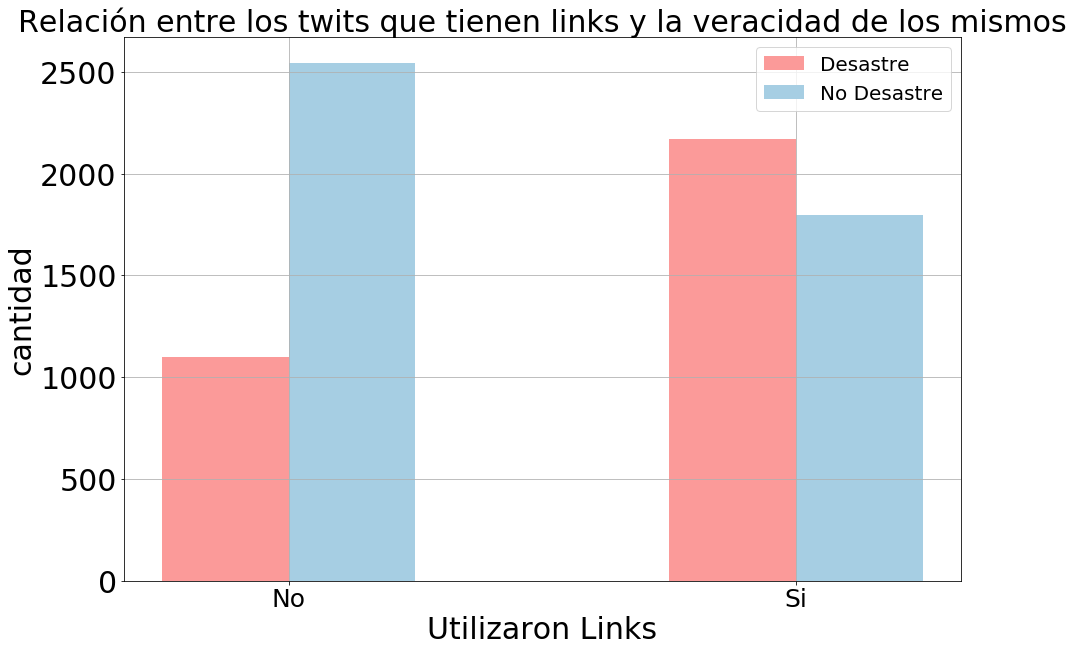

In [107]:
plt.figure(figsize=[15,10])
x=np.arange(2)
y=['No','Si']
plt.bar(x,df[df['target']==1]['cantidad'], width = 0.25,color=plt.cm.Paired(4),label='Desastre')
plt.bar(x+0.25,df[df['target']==0]['cantidad'], width = 0.25,color=plt.cm.Paired(0),label='No Desastre')
plt.grid(True)
plt.xticks([0.125,1.125],y,size=25) 
plt.yticks(size=30)
plt.title('Relación entre los twits que tienen links y la veracidad de los mismos',size=30)
plt.xlabel('Utilizaron Links',size=30)
plt.ylabel('cantidad',size=30)
plt.legend(bbox_to_anchor=(0.8, 0.5, 0.2, 0.5),prop={'size': 20})
plt.show()

# 